In [114]:
# working with directories
import os

# working with numbers
import pandas as pd
import numpy as np

# reading images
from PIL import Image

# plotting
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [44]:
weather_dict = {}
for wc in os.listdir("Dataset"):
    for wi in os.listdir(f"Dataset/{wc}"):
        weather_dict[wi] = wc

In [54]:
# Set up a dataframe of image names and respective weathers
df = pd.DataFrame.from_dict(weather_dict, orient='index')
df.reset_index(inplace=True)
df.columns = ['img_name', 'weather']
df = df.loc[:, ['weather', 'img_name']]
df.sample(10)

,weather,img_name
4587,rime,5128.jpg
6351,snow,0940.jpg
1820,frost,3871.jpg
1324,fogsmog,4701.jpg
5528,rime,6069.jpg
594,dew,2802.jpg
302,dew,2510.jpg
4200,rainbow,0635.jpg
577,dew,2785.jpg
1982,frost,4033.jpg


In [61]:
# Check if all the images have the same extension
df.img_name.str.split('.').str[1].unique()

array(['jpg'], dtype=object)

In [73]:
grouped = df.groupby('weather')['img_name'].count().to_frame()
grouped.reset_index(inplace=True)
grouped.columns = ['Weather', 'Count']

In [112]:
fig = px.bar(grouped, x='Weather', y='Count', 
             title='<b>Number of images by each weather category</b>', 
             color='Count') 

fig.update_layout(
    font_family="Courier New, monospace",
    font_size=12,
    font_color="#0c8df5",
    title_font_color="#0c8df5",
    title_font_family="Courier New, monospace",
    title_x=0.5
)

fig.show()

In [115]:
image = Image.open('Dataset/dew/2208.jpg')

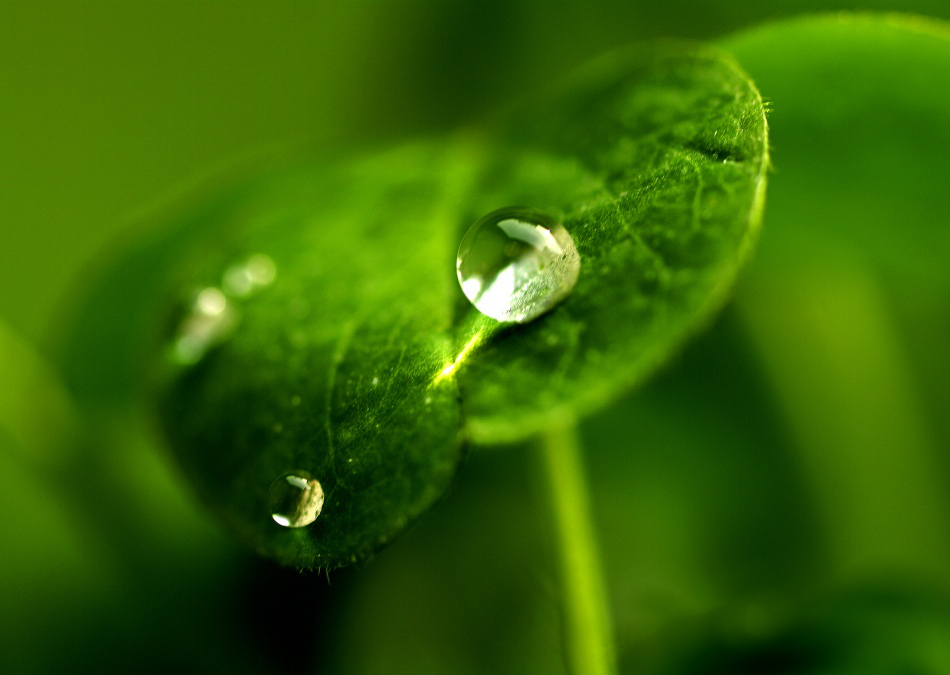

In [116]:
image